<a href="https://colab.research.google.com/github/tahminahasan/ML-Notebook/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary library to fetch datasets from OpenML
from sklearn.datasets import fetch_openml

In [2]:
# Fetching the MNIST dataset from OpenML. "mnist_784" refers to the dataset of 784 pixel values for 28x28 images.
mnist = fetch_openml("mnist_784", version = 1, as_frame = False)
print(mnist)

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 

In [3]:
# Importing pandas for handling and displaying the data in a structured format
import pandas as pd
# Converting the dataset into a DataFrame for easier manipulation
mnist_show= pd.DataFrame(mnist.data)
# Displaying the first 4 rows of the dataset to get a glimpse of the data
mnist_show.head(4)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=mnist ['data']
y=mnist ['target']
x_train, x_test, y_train, y_test = x [:60000], x [60000:], y [:60000], y [60000:]

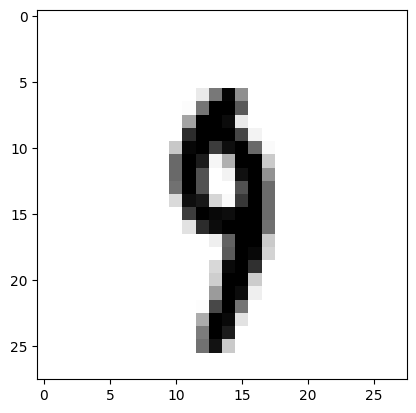

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
display = x[2600]   # Selecting the n'th image.like: 5000th image, or here 0 th image
display_image = display.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(display_image, cmap=matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

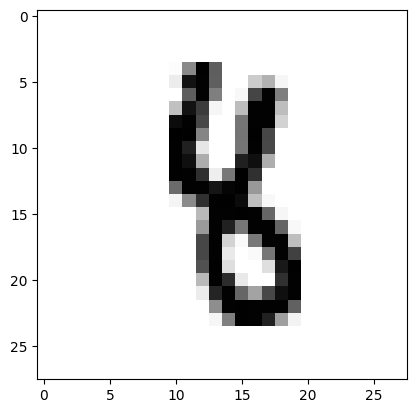

In [6]:
#for visualization.
import matplotlib
import matplotlib.pyplot as plt

# Selecting the 2600th image from the dataset
display = mnist.data[7000]  # mnist.data contains the pixel values

# Reshaping the 1D array (784 pixels) into a 2D array (28x28) for visualization
display_image = display.reshape(28, 28)

# Displaying the image in grayscale (binary colormap)
#cmap=matplotlib.cm.binary: Uses a black-and-white (grayscale) color map.
#interpolation="nearest": Ensures pixel-perfect rendering.
plt.imshow(display_image, cmap=matplotlib.cm.binary, interpolation="nearest")


# Showing the image
plt.show()


In [7]:
mnist.target[7000]

'8'

In [9]:
#Importing the tree module from scikit-learn
from sklearn import tree
 # Creating a Decision Tree Classifier object
dtc = tree.DecisionTreeClassifier()
#training the model
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
predict = dtc.predict (x_test)

In [11]:
#Evaluating Model Performance/ accuracy
dtc.score (x_test, y_test)

0.8799

In [12]:
# Importing metrics for performance evaluation
from sklearn import metrics


In [13]:
#provides detailed performance metrics:
print (metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.86      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.90      0.90      0.90       958
           7       0.90      0.89      0.90      1028
           8       0.84      0.81      0.83       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [14]:
#confusion matrix helps visualize the model’s performance
print (metrics.confusion_matrix(y_test,predict))

[[ 915    1    7    7    4   11   11    6    9    9]
 [   1 1089   12    4    2    5    9    3    9    1]
 [  13   11  884   32   10   11   11   29   22    9]
 [   6   10   27  871    6   38    6   13   14   19]
 [   6    2    8    4  860   10   16   11   23   42]
 [  13   10    6   41   12  750   21    3   22   14]
 [  15    4    9    9   16   20  858    2   21    4]
 [   2   12   30   15    8    8    2  919    8   24]
 [  10    6   26   46   22   28   17   10  789   20]
 [  12    3    6   20   39   15    6   25   19  864]]


In [15]:
dtc.predict ([x_test[2]])

array(['1'], dtype=object)

In [16]:
y_test[2]

'1'